In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

In [2]:
state_wise_confirmed = pd.read_csv('https://api.covid19india.org/csv/latest/states.csv')

state_wise_confirmed1 = state_wise_confirmed[['Date','State', 'Confirmed', 'Tested']]
#print (state_wise_confirmed.iloc[-36: ])
state_wise_confirmed1.loc[state_wise_confirmed1['Date'] == '2020-09-04']

,Date,State,Confirmed,Tested
6161,2020-09-04,Andaman and Nicobar Islands,3257,37825.0
6162,2020-09-04,Andhra Pradesh,476506,3965694.0
6163,2020-09-04,Arunachal Pradesh,4775,180372.0
6164,2020-09-04,Assam,121225,2436127.0
6165,2020-09-04,Bihar,144134,3721250.0
6166,2020-09-04,Chandigarh,5268,33572.0
6167,2020-09-04,Chhattisgarh,40634,634702.0
6168,2020-09-04,Delhi,185220,1705571.0
6169,2020-09-04,Dadra and Nagar Haveli and Daman and Diu,2510,55688.0
6170,2020-09-04,Goa,19863,208917.0


In [3]:
state_all = state_wise_confirmed1['State'].unique().tolist()
state_all.remove('State Unassigned')
print (state_all)

['Kerala', 'India', 'Delhi', 'Telangana', 'Rajasthan', 'Haryana', 'Uttar Pradesh', 'Ladakh', 'Tamil Nadu', 'Jammu and Kashmir', 'Karnataka', 'Maharashtra', 'Punjab', 'Andhra Pradesh', 'Himachal Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chandigarh', 'Chhattisgarh', 'Gujarat', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Goa', 'Mizoram', 'Andaman and Nicobar Islands', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Nagaland', 'Tripura', 'Dadra and Nagar Haveli and Daman and Diu', 'Meghalaya', 'Sikkim']


In [4]:
state_wise_confirmed1['month'] = state_wise_confirmed1['Date'].apply(lambda x: x.split('-')[1])
state_wise_confirmed1['day'] = state_wise_confirmed1['Date'].apply(lambda x: x.split('-')[-1])
state_wise_confirmed1.iloc[ -36: ]
state_wise_confirmed1['Date'][0]

C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


'2020-01-30'

In [23]:
Odisha_test = state_wise_confirmed1.loc[(state_wise_confirmed1['State'] == 'Tamil Nadu') & (state_wise_confirmed1['month'] == '08')]
Odisha_test = Odisha_test.reset_index()
Odisha_test = Odisha_test.drop(columns = ['index'])
daily_tested = []
daily_confirmed = []

value = len(Odisha_test['Tested']) -1
for i in range (0, value):
    daily_tested.append(Odisha_test['Tested'][i+1] - Odisha_test['Tested'][i])

for j in range (0, value):
    daily_confirmed.append(Odisha_test['Confirmed'][j+1] - Odisha_test['Confirmed'][j])
    
print (len(Odisha_test['month']))
print (len(daily_tested))

daily_tested_df = pd.DataFrame(daily_tested)
Odisha_tested1 = pd.concat([Odisha_test, daily_tested_df], axis = 1)
Odisha_tested2 = Odisha_tested1.rename(columns = {0: 'Daily_tested'})

daily_confirmed_df = pd.DataFrame(daily_confirmed)
Odisha_tested3 = pd.concat([Odisha_tested2, daily_confirmed_df], axis = 1)
Odisha_tested4 = Odisha_tested3.rename(columns = {0: 'Daily_confirmed'})


Odisha_tested5 = Odisha_tested4.dropna(axis = 0)
Odisha_tested5['percentage_positive'] = (Odisha_tested5['Daily_confirmed']/ Odisha_tested5['Daily_tested'])*100


avg_percentage_positive = Odisha_tested5['percentage_positive'].mean()
Odisha_tested5

31
30


C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Date,State,Confirmed,Tested,month,day,percentage_positive,Daily_tested,Daily_confirmed
0,2020-08-01,Tamil Nadu,251738,2718718.0,08,01,9.735848,60344.0,5875.0
1,2020-08-02,Tamil Nadu,257613,2779062.0,08,02,9.635636,58211.0,5609.0
2,2020-08-03,Tamil Nadu,263222,2837273.0,08,03,9.185080,55122.0,5063.0
3,2020-08-04,Tamil Nadu,268285,2892395.0,08,04,8.460583,61166.0,5175.0
4,2020-08-05,Tamil Nadu,273460,2953561.0,08,05,8.464253,67153.0,5684.0
5,2020-08-06,Tamil Nadu,279144,3020714.0,08,06,8.730253,67352.0,5880.0
6,2020-08-07,Tamil Nadu,285024,3088066.0,08,07,8.708718,67553.0,5883.0
7,2020-08-08,Tamil Nadu,290907,3155619.0,08,08,8.540165,70186.0,5994.0
8,2020-08-09,Tamil Nadu,296901,3225805.0,08,09,8.806755,67153.0,5914.0
9,2020-08-10,Tamil Nadu,302815,3292958.0,08,10,8.643987,67492.0,5834.0


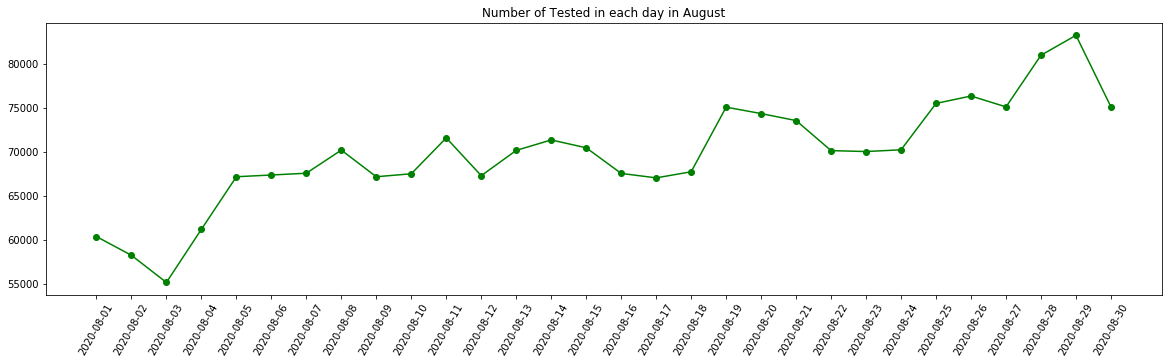

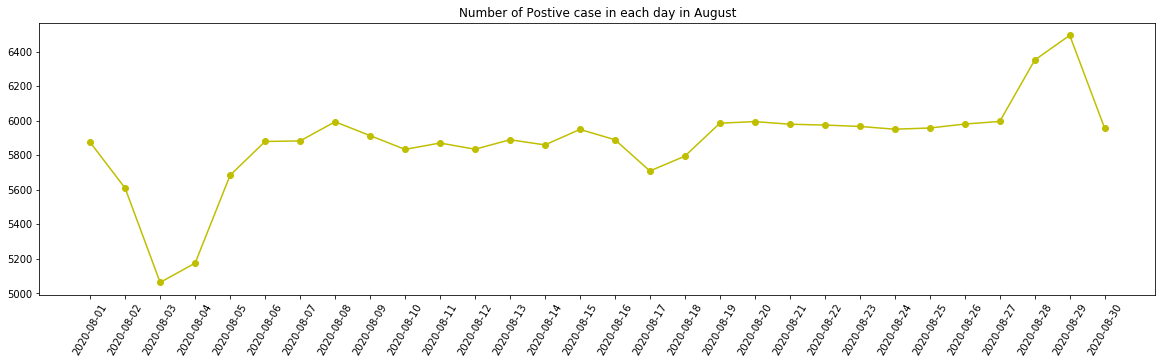

In [24]:
plt.figure(figsize= (20,5))
plt.title('Number of Tested in each day in August')
plt.plot(Odisha_tested5['Date'], Odisha_tested5['Daily_tested'], marker = 'o', color = 'g')
plt.xticks(rotation = 60)
plt.show()
plt.figure(figsize= (20,5))
plt.title('Number of Postive case in each day in August')
plt.plot(Odisha_tested5['Date'], Odisha_tested5['Daily_confirmed'],  marker = 'o', color = 'y')
plt.xticks(rotation = 60)
plt.show()

In [6]:
state_wise_positive = []

for st in state_all:
    Odisha_test = state_wise_confirmed1.loc[(state_wise_confirmed1['State'] == st) & (state_wise_confirmed1['month'] == '08')]
    Odisha_test = Odisha_test.reset_index()
    Odisha_test = Odisha_test.drop(columns = ['index'])
    daily_tested = []
    daily_confirmed = []

    value = len(Odisha_test['Tested']) -1
    for i in range (0, value):
        daily_tested.append(Odisha_test['Tested'][i+1] - Odisha_test['Tested'][i])

    for j in range (0, value):
        daily_confirmed.append(Odisha_test['Confirmed'][j+1] - Odisha_test['Confirmed'][j])
    
    #print (len(Odisha_test['month']))
    #print (daily_tested)

    daily_tested_df = pd.DataFrame(daily_tested)
    Odisha_tested1 = pd.concat([Odisha_test, daily_tested_df], axis = 1)
    Odisha_tested2 = Odisha_tested1.rename(columns = {0: 'Daily_tested'})

    daily_confirmed_df = pd.DataFrame(daily_confirmed)
    Odisha_tested3 = pd.concat([Odisha_tested2, daily_confirmed_df], axis = 1)
    Odisha_tested4 = Odisha_tested3.rename(columns = {0: 'Daily_confirmed'})


    Odisha_tested5 = Odisha_tested4.dropna(axis = 0)
    Odisha_tested5['percentage_positive'] = (Odisha_tested5['Daily_confirmed']/ Odisha_tested5['Daily_tested'])*100


    avg_percentage_positive = Odisha_tested5['percentage_positive'].mean()
    state_wise_positive.append(avg_percentage_positive)



C:\Users\dppalai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
state_wise_positive_df = pd.DataFrame(state_wise_positive)
state_all_df = pd.DataFrame(state_all)
state_wise_positive_table = pd.concat([state_all_df,state_wise_positive_df ], axis = 1)
state_wise_positive_table

,0,0
0,Kerala,5.769542
1,India,8.496623
2,Delhi,7.170690
3,Telangana,7.720612
4,Rajasthan,5.817428
5,Haryana,5.684650
6,Uttar Pradesh,inf
7,Ladakh,inf
8,Tamil Nadu,8.453629
9,Jammu and Kashmir,5.334064


In [8]:
state_wise_positive_table1 = pd.DataFrame({'Name_Of_State': state_all,'Positive_Case': state_wise_positive})
state_wise_positive_table1

,Name_Of_State,Positive_Case
0,Kerala,5.769542
1,India,8.496623
2,Delhi,7.170690
3,Telangana,7.720612
4,Rajasthan,5.817428
5,Haryana,5.684650
6,Uttar Pradesh,inf
7,Ladakh,inf
8,Tamil Nadu,8.453629
9,Jammu and Kashmir,5.334064


In [9]:
import numpy as np
state_wise_positive_table2 = state_wise_positive_table1[state_wise_positive_table1.Positive_Case!= np.inf]
state_wise_positive_table2
state_wise_positive_table3 = state_wise_positive_table2.sort_values(by = 'Positive_Case' )
state_wise_positive_table3

,Name_Of_State,Positive_Case
21,Gujarat,2.618393
30,Arunachal Pradesh,2.942741
23,Bihar,3.500381
9,Jammu and Kashmir,5.334064
22,Madhya Pradesh,5.389965
28,Assam,5.433936
5,Haryana,5.684650
0,Kerala,5.769542
4,Rajasthan,5.817428
15,Uttarakhand,5.823619


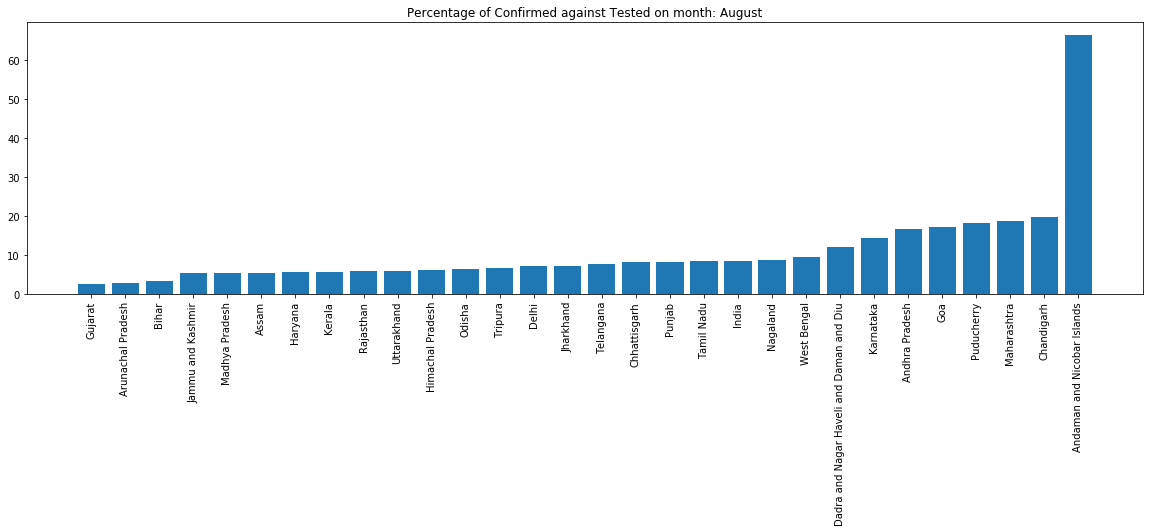

In [10]:
plt.figure(figsize = (20, 5))
plt.title('Percentage of Confirmed against Tested on month: August')
plt.xticks(rotation = 90)
plt.bar(state_wise_positive_table3['Name_Of_State'], state_wise_positive_table3['Positive_Case'])
plt.show()